# Visualise skills coreness
Felix Zaussinger | 28.07.2021

## Core Analysis Goal(s)
1.

## Key Insight(s)
1.

**Kanders et al. 2020**:

We tested the impact of upskilling for 100 ESCO skills, which we named
‘core skills’ due to their special relationships with the other skills. The
core skills were identified by constructing a graph where each node is an ESCO
skill, and a pair of skills was connected if they happen to be used in the same
occupation (as either, an optional or essential skill). For each node, we
derived a measure of node ‘coreness’ (ki) by combining three widely used metrics
from graph theory: betweenness centrality (bi), eigenvector centrality (ei) and
the clustering coefficient (ci). T

The coreness measure of a skill will be high if the skill is connected to
diverse sets of skills that are weakly connected to each other (the latter is
ensured by the use of the clustering coefficient, which measures whether the
neighbours of the node are also connected themselves).

In [102]:
import os
import sys
import logging
from pathlib import Path

import numpy as np
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("ticks")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

from tqdm import tqdm
from scipy.spatial.distance import pdist, squareform

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Define directory structure

In [40]:
# project directory
abspath = os.path.abspath('')
project_dir = str(Path(abspath).parents[0])

# sub-directories
data_raw = os.path.join(project_dir, "data", "raw")
data_interim = os.path.join(project_dir, "data", "interim")
data_processed = os.path.join(project_dir, "data", "processed")
figure_dir = os.path.join(project_dir, "reports", "figures")

Data

In [41]:
coreness = pd.read_csv(
    os.path.join(
        data_raw, "mcc_data", "interim", "upskilling_analysis",
        "skills_coreness_measure.csv"
    ),
    index_col=0
)

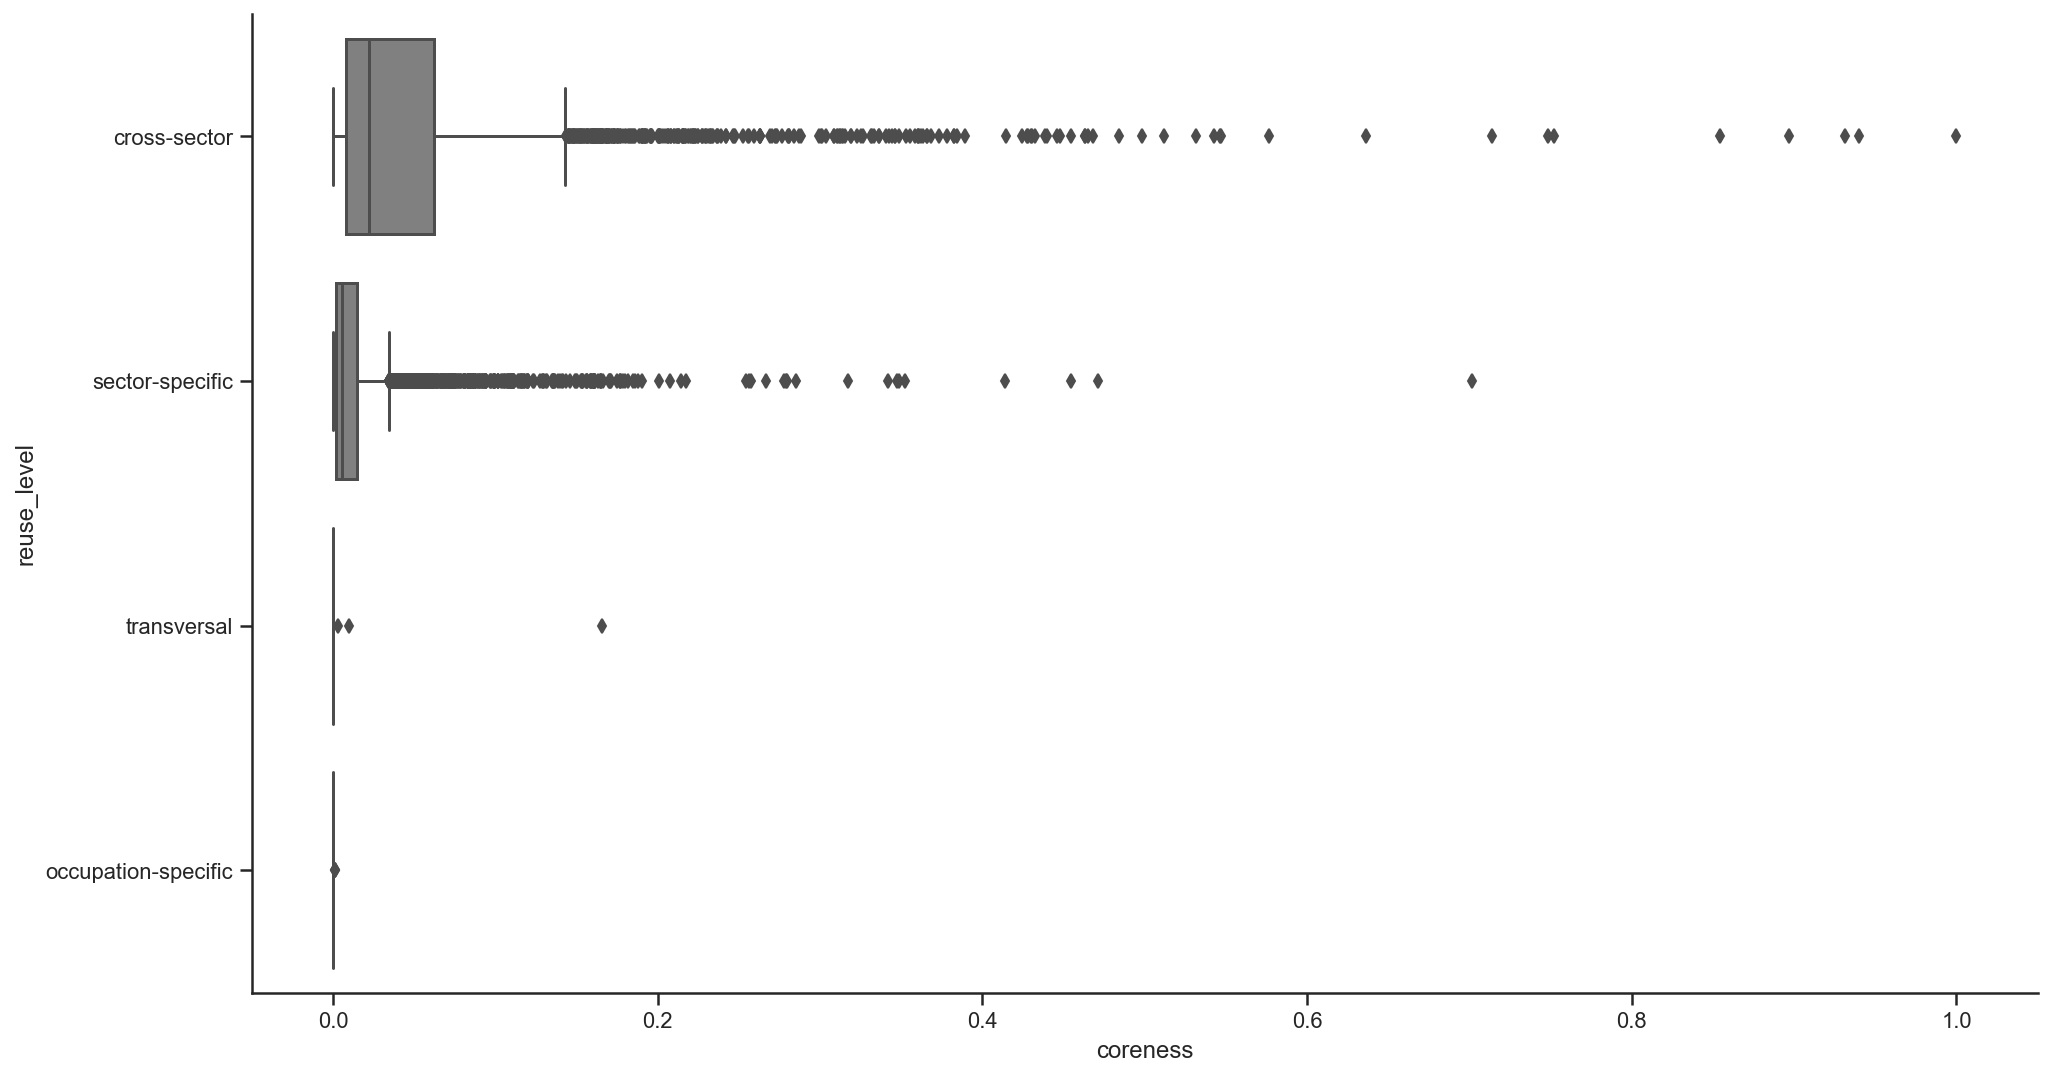

In [42]:
sns.boxplot(
    data=coreness,
    y="reuse_level",
    x="coreness",
    orient="h",
    color="grey",
    order=coreness.groupby("reuse_level").mean().sort_values("coreness", ascending=False).index.values
)

sns.despine()

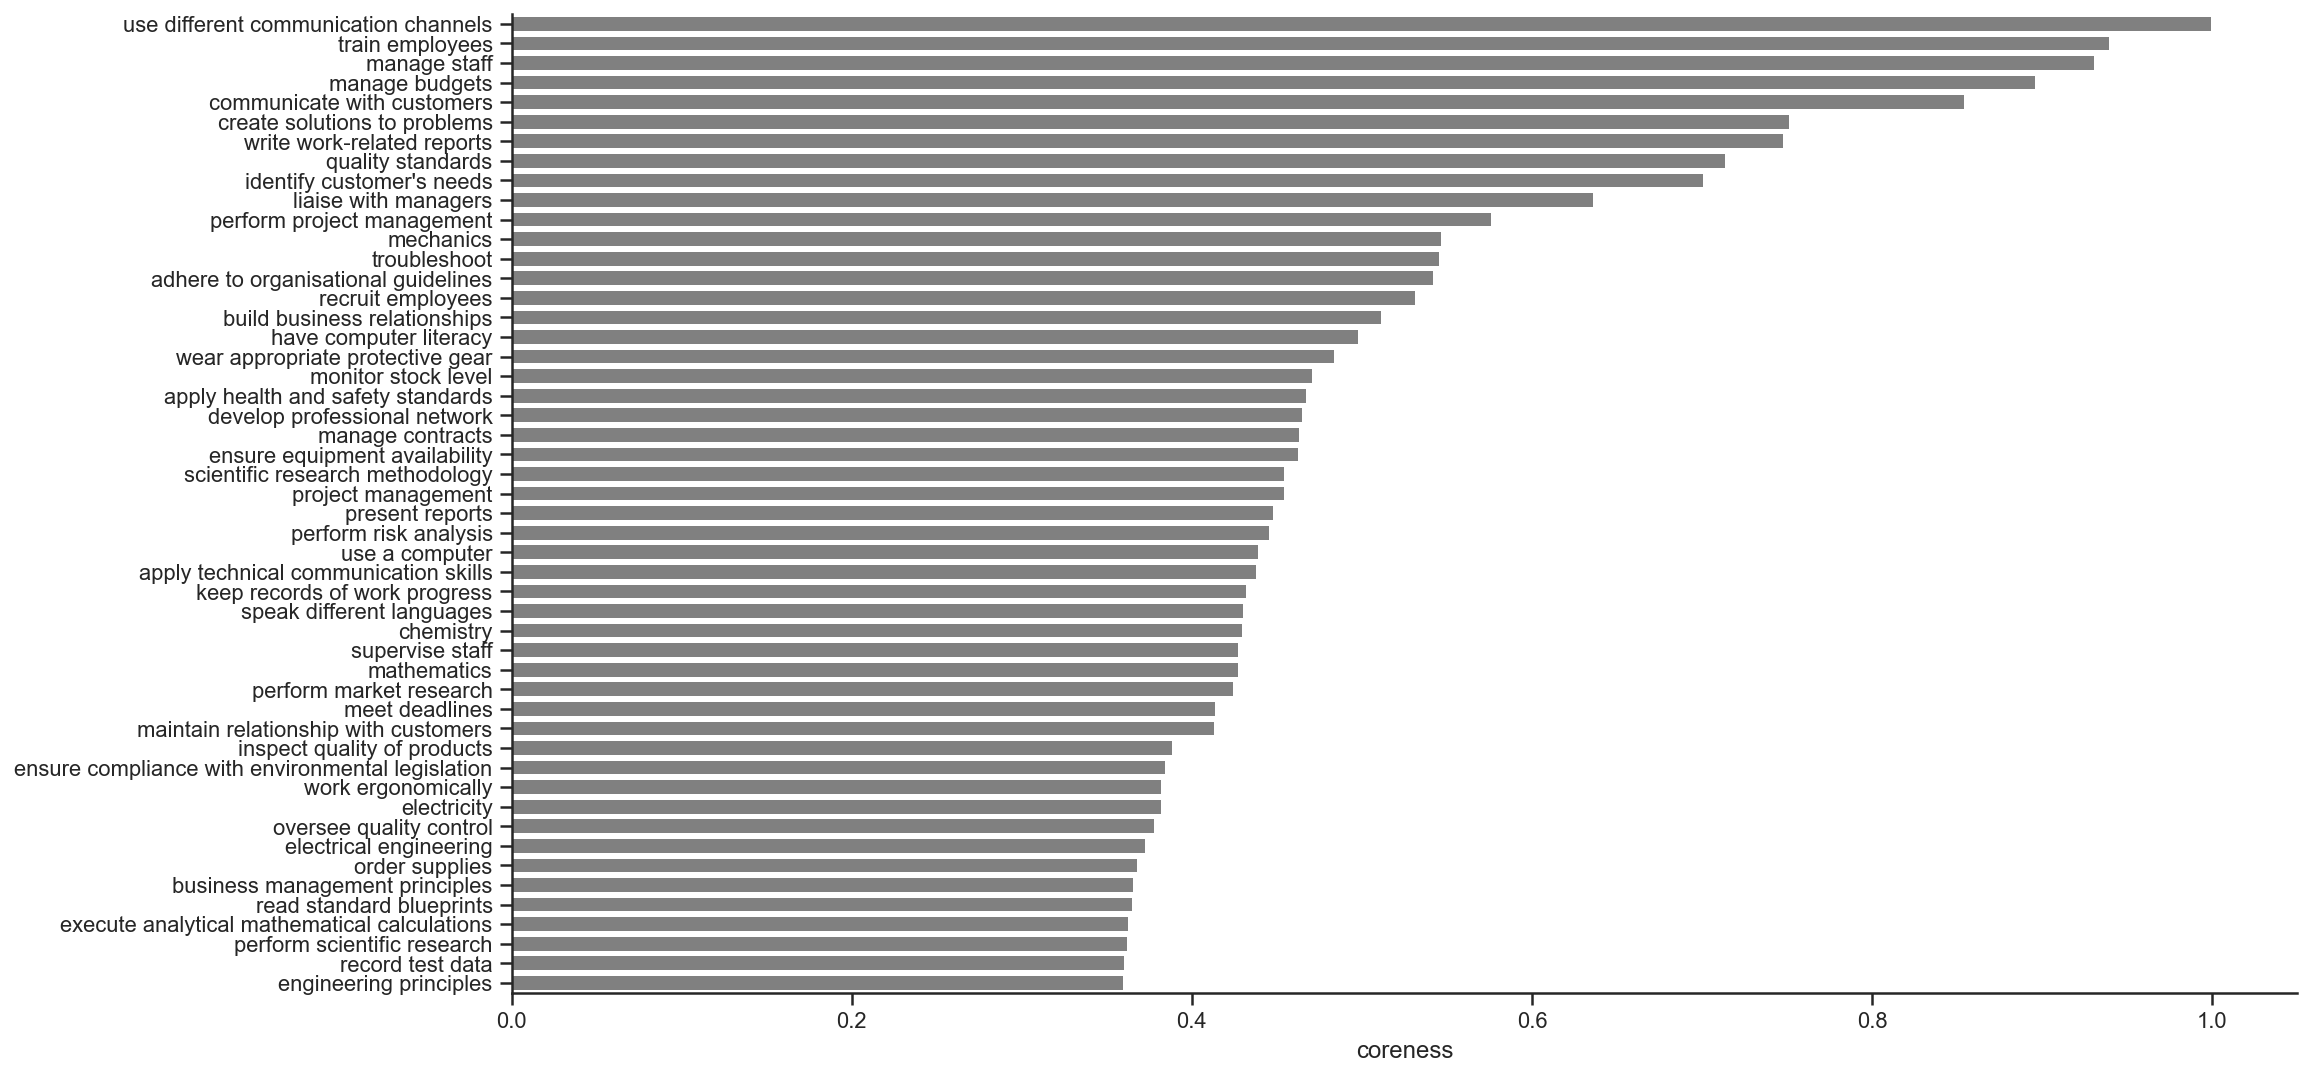

In [43]:
ax = sns.barplot(
    data=coreness.sort_values("coreness", ascending=False).head(50),
    y="preferred_label",
    x="coreness",
    orient="h",
    color="grey",
)

ax.set_ylabel(None)
sns.despine()

In [44]:
coreness.coreness.quantile(np.arange(0, 1.1, 0.1))

0.0    0.000000
0.1    0.000000
0.2    0.000000
0.3    0.000000
0.4    0.001758
0.5    0.004079
0.6    0.007405
0.7    0.013096
0.8    0.025144
0.9    0.056293
1.0    1.000000
Name: coreness, dtype: float64

<AxesSubplot:>

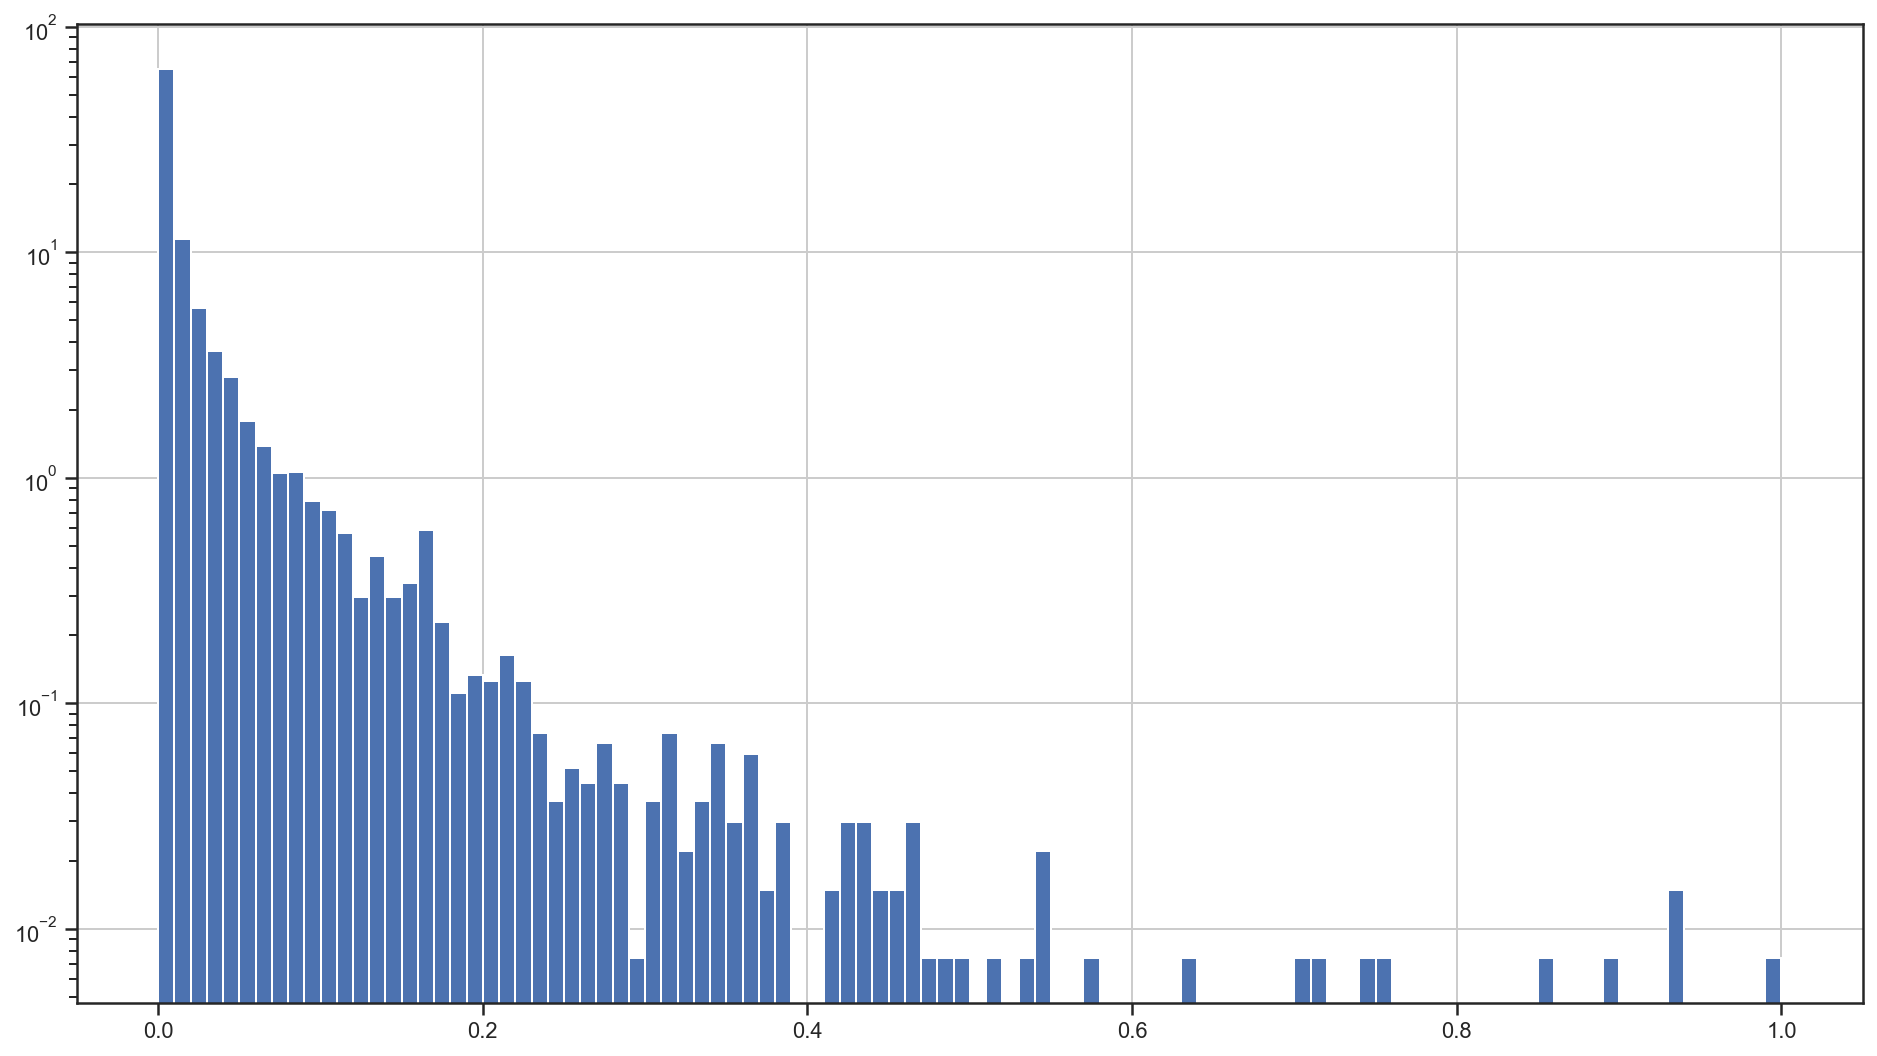

In [45]:
coreness.coreness.hist(bins=100, density=True, log=True)

## Examples for Cedefop note

Surface Miner: http://data.europa.eu/esco/occupation/4a215d87-8363-4db2-a661-3c0d816b2a70

In [46]:
occ_skills_matrix = pd.read_pickle(
        os.path.join(project_dir, "data", "processed", "adjacency_matrix.pkl")
)

occ_skills_matrix_essential_optional = pd.read_pickle(
        os.path.join(project_dir, "data", "processed", "adjacency_matrix_essential_optional.pkl")
)

In [47]:
surface_miner = "http://data.europa.eu/esco/occupation/4a215d87-8363-4db2-a661-3c0d816b2a70"

coreness["surface_miner"] = occ_skills_matrix_essential_optional.loc[surface_miner,:].values

coreness[(coreness.surface_miner == 1)].coreness.median()

0.11547450302537585

In [48]:
environmental_technician = "http://data.europa.eu/esco/occupation/e8461d2e-3d75-477c-93a2-ea8d342bb55b"

coreness["environmental_technician"] = occ_skills_matrix_essential_optional.loc[environmental_technician,:].values

coreness[coreness.environmental_technician == 1].coreness.mean()

0.16538852922124658

In [49]:
solar_energy_technician = "http://data.europa.eu/esco/occupation/75b63949-1b93-4bf2-a777-ccf978dc3e8a"

coreness["solar_energy_technician"] = occ_skills_matrix_essential_optional.loc[solar_energy_technician,:].values

coreness[coreness.solar_energy_technician == 1].coreness.median()

0.13955100731075526

<AxesSubplot:>

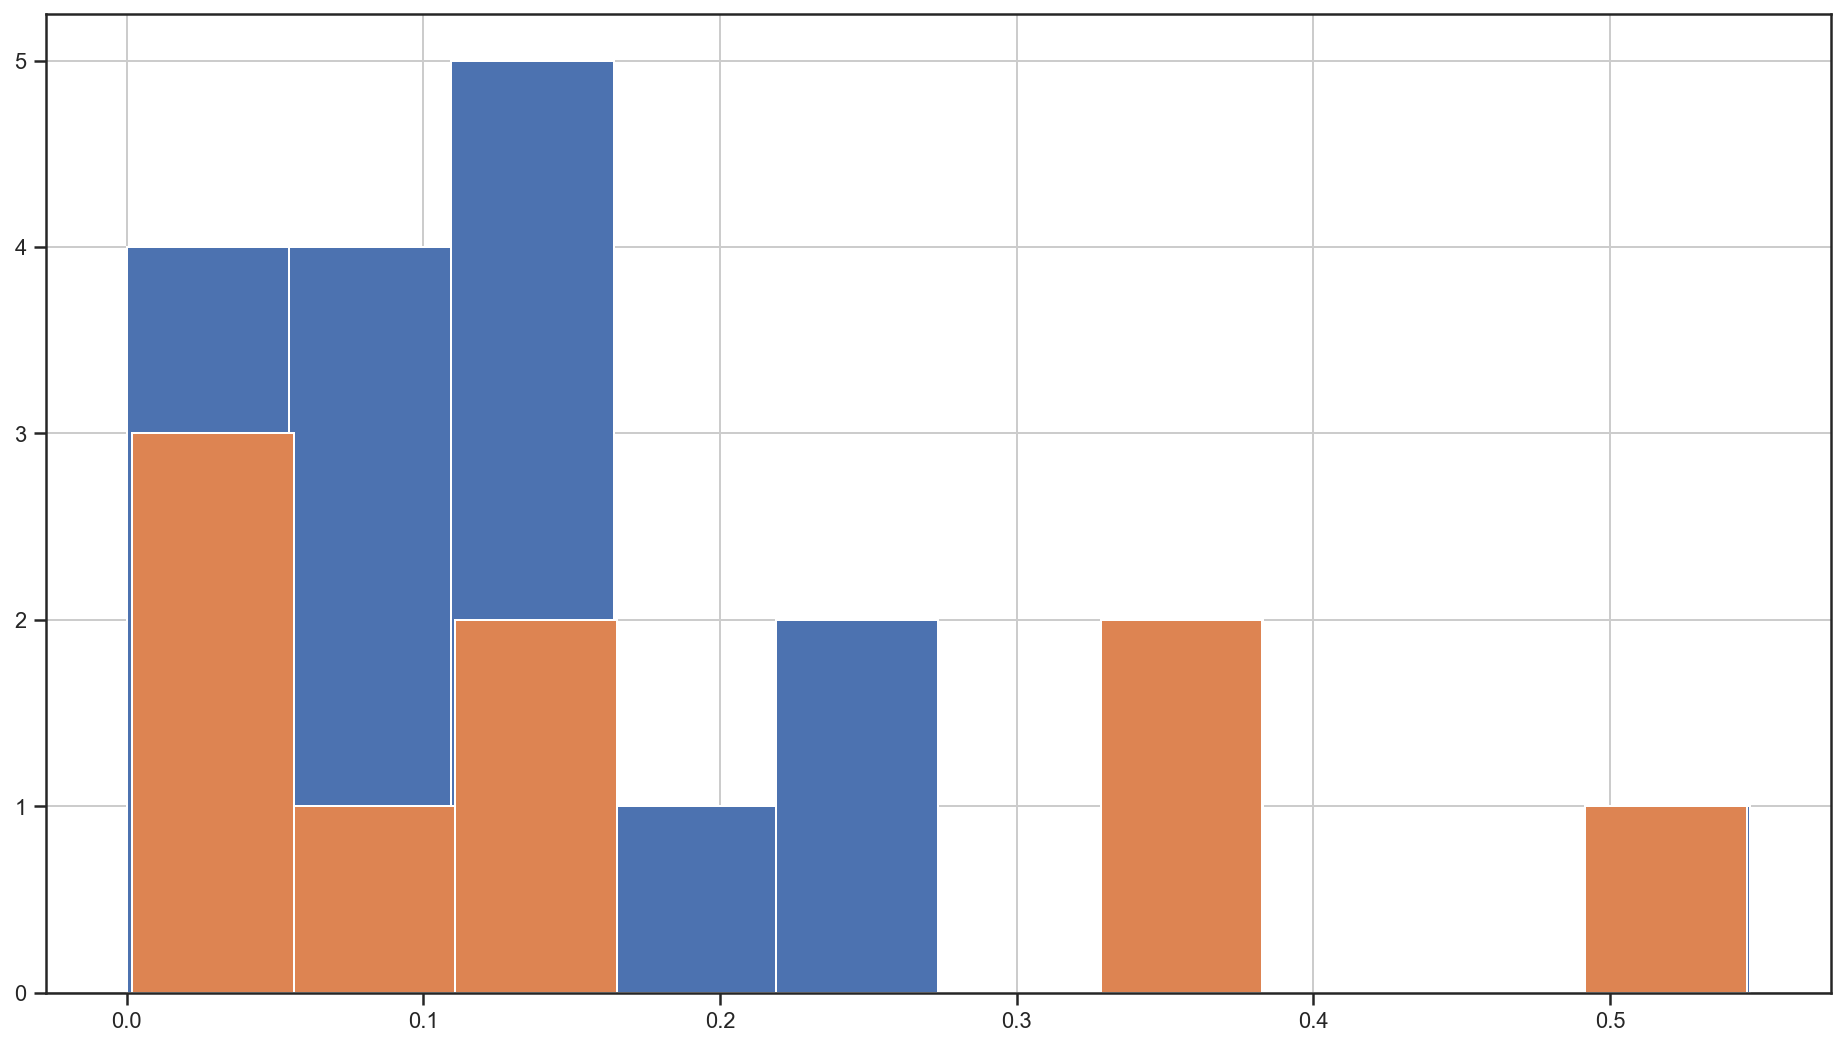

In [128]:
coreness[coreness.solar_energy_technician == 1].coreness.hist()
coreness[(coreness.surface_miner == 1)].coreness.hist()

In [50]:
table_miner = coreness[coreness.surface_miner == 1].sort_values("coreness", ascending=False)
table_miner[["preferred_label", "reuse_level", "skill_category", "coreness"]]

,preferred_label,reuse_level,skill_category,coreness
id,,,,
2756,troubleshoot,cross-sector,S,0.546028
1123,work ergonomically,cross-sector,S,0.382439
9791,address problems critically,cross-sector,S,0.344067
2279,drive vehicles,cross-sector,S,0.156237
10150,perform minor repairs to equipment,cross-sector,S,0.115475
2895,impact of geological factors on mining operations,sector-specific,K,0.066942
11087,excavation techniques,sector-specific,K,0.053439
8844,operate hydraulic pumps,sector-specific,S,0.025663
4683,operate mining tools,sector-specific,S,0.001873


In [51]:
table_pv = coreness[coreness.solar_energy_technician == 1].sort_values("coreness", ascending=False)
table_pv[["preferred_label", "reuse_level", "skill_category", "coreness"]]

,preferred_label,reuse_level,skill_category,coreness
id,,,,
12571,mechanics,cross-sector,K,0.547214
1123,work ergonomically,cross-sector,S,0.382439
10570,electricity,cross-sector,K,0.382295
9757,use measurement instruments,cross-sector,S,0.236986
3272,comply with legal regulations,cross-sector,S,0.221480
11013,electrical wiring plans,cross-sector,K,0.165574
13197,follow safety procedures when working at heights,cross-sector,S,0.161312
4306,inspect construction supplies,cross-sector,S,0.161127
7161,follow health and safety procedures in constru...,cross-sector,S,0.142051


In [52]:
occs = {
    "surface miner": "http://data.europa.eu/esco/occupation/4a215d87-8363-4db2-a661-3c0d816b2a70",
    "solar energy technician": "http://data.europa.eu/esco/occupation/75b63949-1b93-4bf2-a777-ccf978dc3e8a",
    "renewable energy engineer": "http://data.europa.eu/esco/occupation/0e99c929-364f-4b0a-8a64-2aab42420f00",
    "recycling worker": "http://data.europa.eu/esco/occupation/4ed9ce62-75d4-4b05-80d4-e86528fecdcd",
    "environmental technician": "http://data.europa.eu/esco/occupation/e8461d2e-3d75-477c-93a2-ea8d342bb55b",
    "mining assistant": "http://data.europa.eu/esco/occupation/efd5d3cb-3716-43b7-b21b-98e17f00e9eb",
    "surface mine plant operator": "http://data.europa.eu/esco/occupation/b5b8c259-7557-4f5f-9f56-155b038946c1",
    "petroleum engineer": "http://data.europa.eu/esco/occupation/7569f423-2c37-49aa-947e-41acb66ec909",
    "oil rig motorhand": "http://data.europa.eu/esco/occupation/d3c1c718-a093-4e2e-80a0-2bd331266a8b",
    "mining electrician": "http://data.europa.eu/esco/occupation/c07ab008-79c1-4516-8dcc-8289f797dc34",
    "driller": "http://data.europa.eu/esco/occupation/364e61ab-1631-4fe1-a170-e88797aad6f9",
    "tool pusher": "http://data.europa.eu/esco/occupation/5d549551-d94a-4e98-8444-d6608d70c8d8",
    "environmental engineer": "http://data.europa.eu/esco/occupation/ac1fc6a9-70d2-475c-8fa0-82ef83830968",
    "civil engineer": "http://data.europa.eu/esco/occupation/d7d986e1-7333-431b-9719-0c5c6939e360"
}

res = {}
for name, link in occs.items():
    coreness["occ"] = occ_skills_matrix_essential_optional.loc[link,:].values
    res[name] = coreness[coreness.occ == 1].coreness.mean()

pd.DataFrame(res, index=["mean_coreness"]).T.sort_values("mean_coreness", ascending=False)

,mean_coreness
civil engineer,0.257755
environmental engineer,0.210737
surface miner,0.188018
renewable energy engineer,0.175289
environmental technician,0.165389
solar energy technician,0.161810
mining assistant,0.159290
surface mine plant operator,0.154169
recycling worker,0.121420
petroleum engineer,0.119385


Calculations for 3 groups: green, brown, neutral

In [53]:
df_metadata = pd.read_csv(
    os.path.join(data_interim, "ESCO_ONET_METADATA.csv"),
    index_col=0
)

In [54]:
# own classification of brown occupations
occ_ff_commented = pd.read_excel(
    os.path.join(data_interim, "occupations_mining_fossil_fuels_commented.xlsx"),
    sheet_name="keyword_selection"
)

occ_ff_commented = occ_ff_commented.rename(columns={'Unnamed: 0': "id"})
occ_ff_commented["selection_broad"] = occ_ff_commented["felix"]
occ_ff_commented["selection_narrow"] = (occ_ff_commented.felix == True) & (occ_ff_commented.comment != "unsure")

df_brown_occ_narrow = occ_ff_commented.query("selection_narrow == True")

# merge back to df_metadata
df_metadata = pd.merge(
    df_metadata,
    occ_ff_commented[["id", "selection_broad"]],
    on="id",
    how="left"
).rename(
    columns={"selection_broad": "is_brown"}
).fillna(
    value={"is_brown": False}
)

In [55]:
# vona 2018 classification of brown jobs matched to esco

vona_brown = pd.read_csv(
    os.path.join(data_interim, "occupations_brown_vona_esco.csv"),
    index_col=0
)

vona_brown["is_brown_vona"] = np.ones(vona_brown.shape[0], dtype=bool)

df_metadata = pd.merge(
    df_metadata,
    vona_brown[["concept_uri", "is_brown_vona"]],
    on="concept_uri",
    how="left"
)

In [56]:
# establish categories
df_metadata["is_green"] = df_metadata.greenness_vona_2018_v2 > 0
df_metadata["is_brown_vona"] = df_metadata["is_brown_vona"].fillna(False)
df_metadata["is_neutral"] = (df_metadata.is_green == False) & (df_metadata.is_brown == False)
df_metadata["is_neutral_vona"] = (df_metadata.is_green == False) & (df_metadata.is_brown_vona == False)

### Results for own classification of brown occupations

In [57]:
# brown
res = {}
for link in df_metadata[df_metadata.is_brown].concept_uri.values:
    coreness["occ"] = occ_skills_matrix_essential_optional.loc[link,:].values
    res[link] = coreness[coreness.occ == 1].coreness.mean()

coreness_brown = pd.DataFrame(res, index=["brown"]).T.sort_values("brown", ascending=False)

# green
res = {}
for link in df_metadata[df_metadata.is_green].concept_uri.values:
    coreness["occ"] = occ_skills_matrix_essential_optional.loc[link,:].values
    res[link] = coreness[coreness.occ == 1].coreness.mean()

coreness_green = pd.DataFrame(res, index=["green"]).T.sort_values("green", ascending=False)

# neutral
res = {}
for link in df_metadata[df_metadata.is_neutral].concept_uri.values:
    coreness["occ"] = occ_skills_matrix_essential_optional.loc[link,:].values
    res[link] = coreness[coreness.occ == 1].coreness.mean()

coreness_neutral = pd.DataFrame(res, index=["neutral"]).T.sort_values("neutral", ascending=False)

In [71]:
print(coreness_brown.median())
print(coreness_green.median())
print(coreness_neutral.median())

brown    0.099318
dtype: float64
green    0.154552
dtype: float64
neutral    0.107814
dtype: float64


In [59]:
dfc = pd.DataFrame(df_metadata.concept_uri)
dfc.index = dfc.concept_uri

df_coreness = dfc.join(coreness_neutral).join(coreness_brown).join(coreness_green)
df_coreness = df_coreness.drop(labels="concept_uri", axis=1)

<AxesSubplot:>

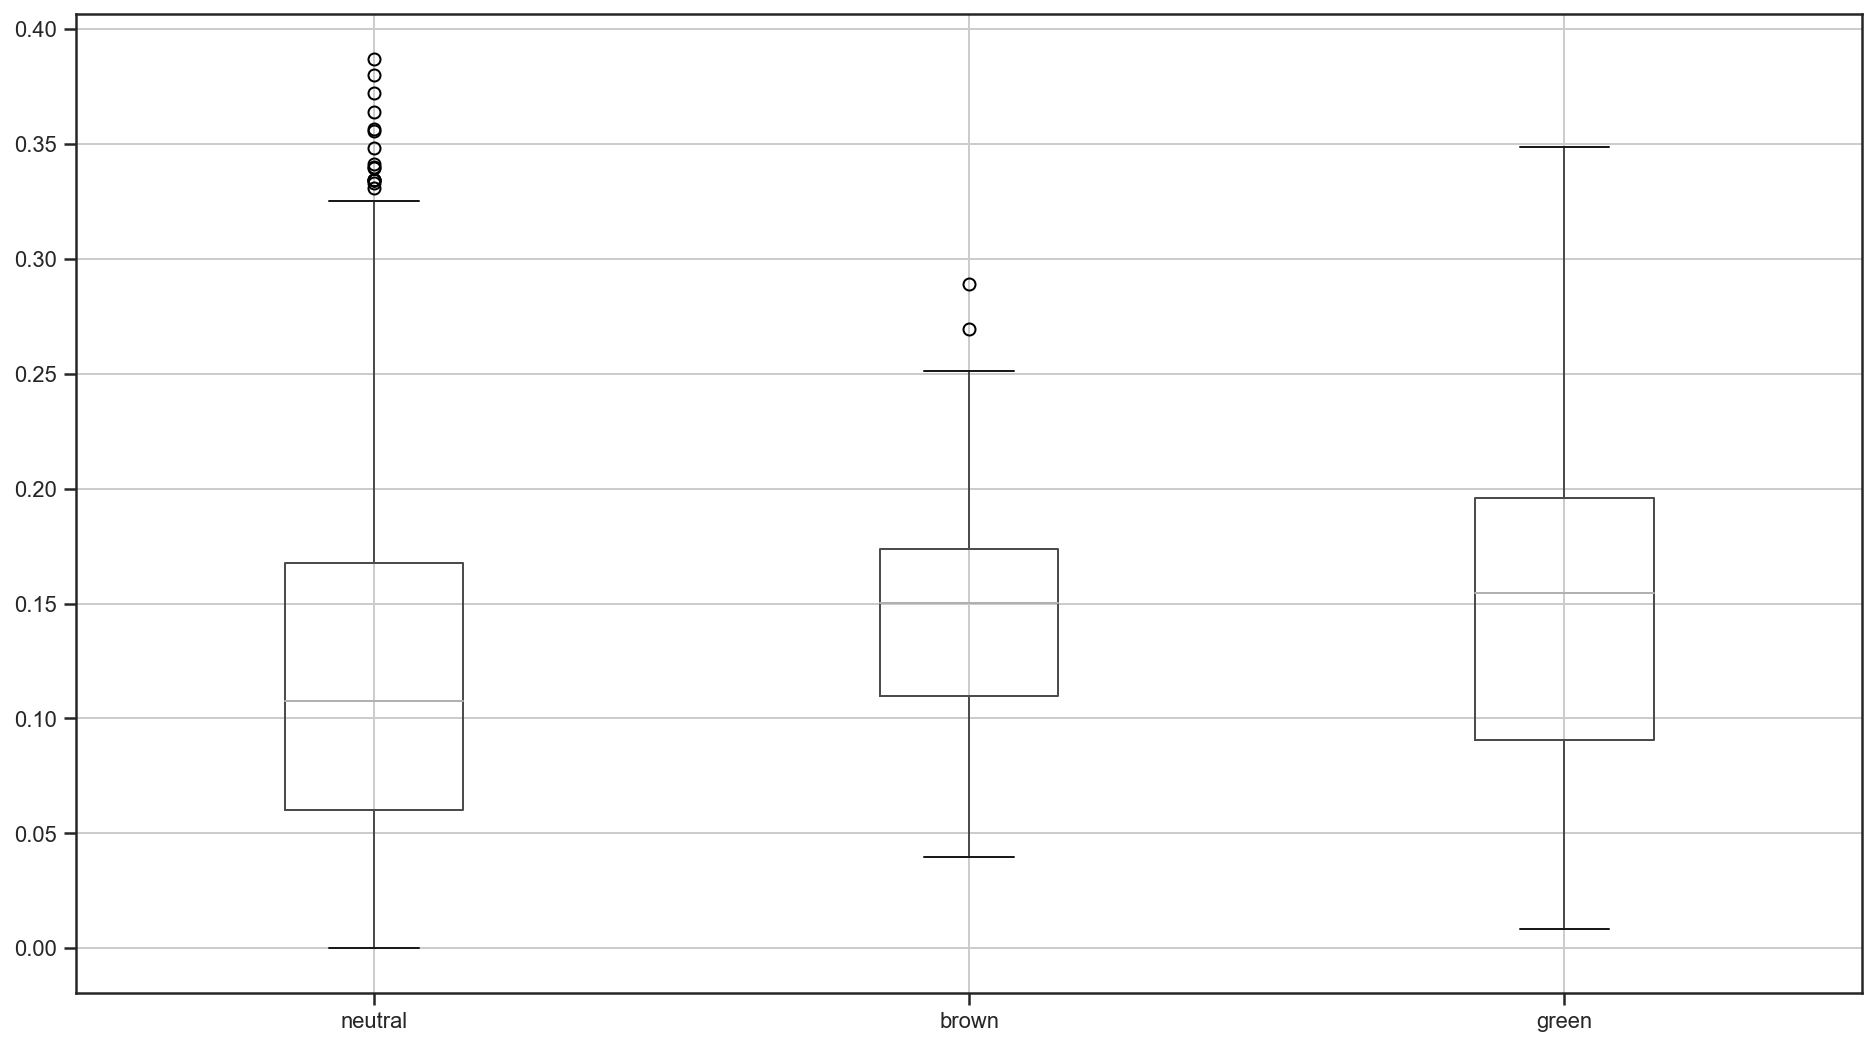

In [60]:
df_coreness.boxplot()

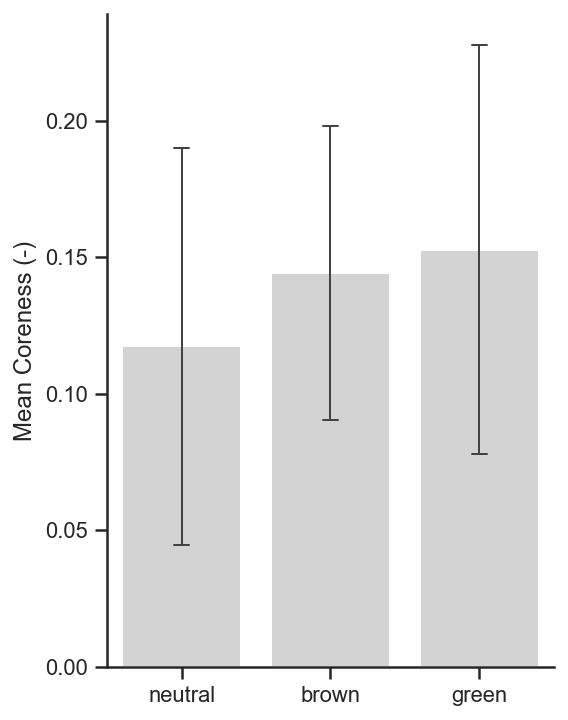

In [61]:
f, ax = plt.subplots(figsize=(4, 6))
sns.barplot(
    data=df_coreness,
    color="lightgrey",
    ci="sd",
    errwidth=1,
    capsize=.1,
    orient="v",
    ax=ax
)

ax.set_ylabel("Mean Coreness (-)")

sns.despine()

### Results for Vona 2018 classification of brown occupations

In [62]:
# brown
res = {}
for link in df_metadata[df_metadata.is_brown_vona].concept_uri.values:
    coreness["occ"] = occ_skills_matrix_essential_optional.loc[link,:].values
    res[link] = coreness[coreness.occ == 1].coreness.mean()

coreness_brown = pd.DataFrame(res, index=["brown"]).T.sort_values("brown", ascending=False)

# green
res = {}
for link in df_metadata[df_metadata.is_green].concept_uri.values:
    coreness["occ"] = occ_skills_matrix_essential_optional.loc[link,:].values
    res[link] = coreness[coreness.occ == 1].coreness.mean()

coreness_green = pd.DataFrame(res, index=["green"]).T.sort_values("green", ascending=False)

# neutral
res = {}
for link in df_metadata[df_metadata.is_neutral_vona].concept_uri.values:
    coreness["occ"] = occ_skills_matrix_essential_optional.loc[link,:].values
    res[link] = coreness[coreness.occ == 1].coreness.mean()

coreness_neutral = pd.DataFrame(res, index=["neutral"]).T.sort_values("neutral", ascending=False)

In [63]:
coreness_brown.mean()
coreness_green.mean()
coreness_neutral

,neutral
http://data.europa.eu/esco/occupation/52b9e8dc-de6c-41dd-b29a-e1291c273f6f,0.387191
http://data.europa.eu/esco/occupation/bdfb48e0-79dc-4b63-8470-db2e03b37326,0.380252
http://data.europa.eu/esco/occupation/6426ada1-4d8c-4612-99e3-91bc569805ee,0.372233
http://data.europa.eu/esco/occupation/c6bd511a-d966-4df9-a48e-4f800354f268,0.363990
http://data.europa.eu/esco/occupation/219d1c30-3849-4de3-b0d6-07da187b6521,0.356353
...,...
http://data.europa.eu/esco/occupation/e31c83ac-cb74-4936-88f1-90ed0997b29b,0.000983
http://data.europa.eu/esco/occupation/082c234c-0dda-490a-b5af-757c3e48da90,0.000625
http://data.europa.eu/esco/occupation/71f09c8b-a172-408c-b9e7-32e580e39ff6,0.000000
http://data.europa.eu/esco/occupation/9b889f07-c39c-464d-b9d9-b2daa650f9ac,0.000000


In [64]:
dfc = pd.DataFrame(df_metadata.concept_uri)
dfc.index = dfc.concept_uri

df_coreness = dfc.join(coreness_neutral).join(coreness_brown).join(coreness_green)
df_coreness = df_coreness.drop(labels="concept_uri", axis=1)

array([[<AxesSubplot:title={'center':'neutral'}>,
        <AxesSubplot:title={'center':'brown'}>],
       [<AxesSubplot:title={'center':'green'}>, <AxesSubplot:>]],
      dtype=object)

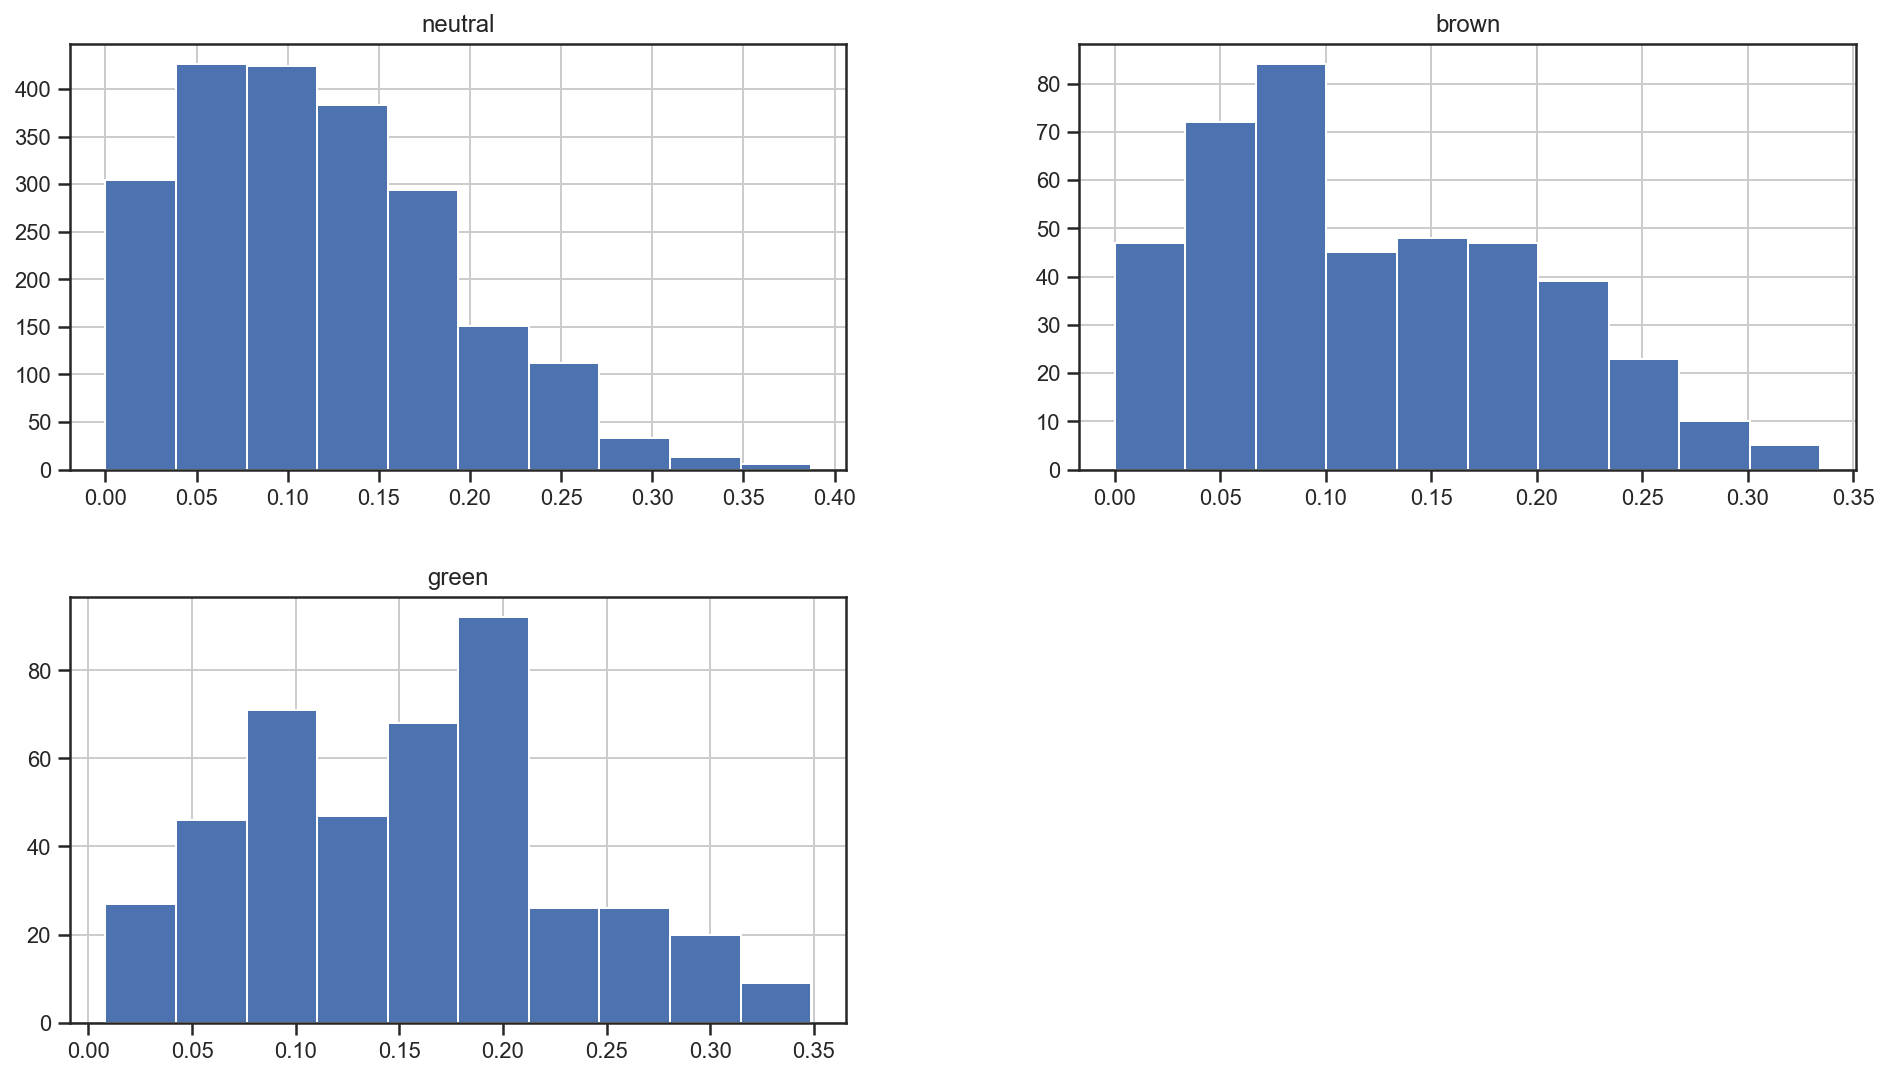

In [75]:
df_coreness.hist()

<AxesSubplot:>

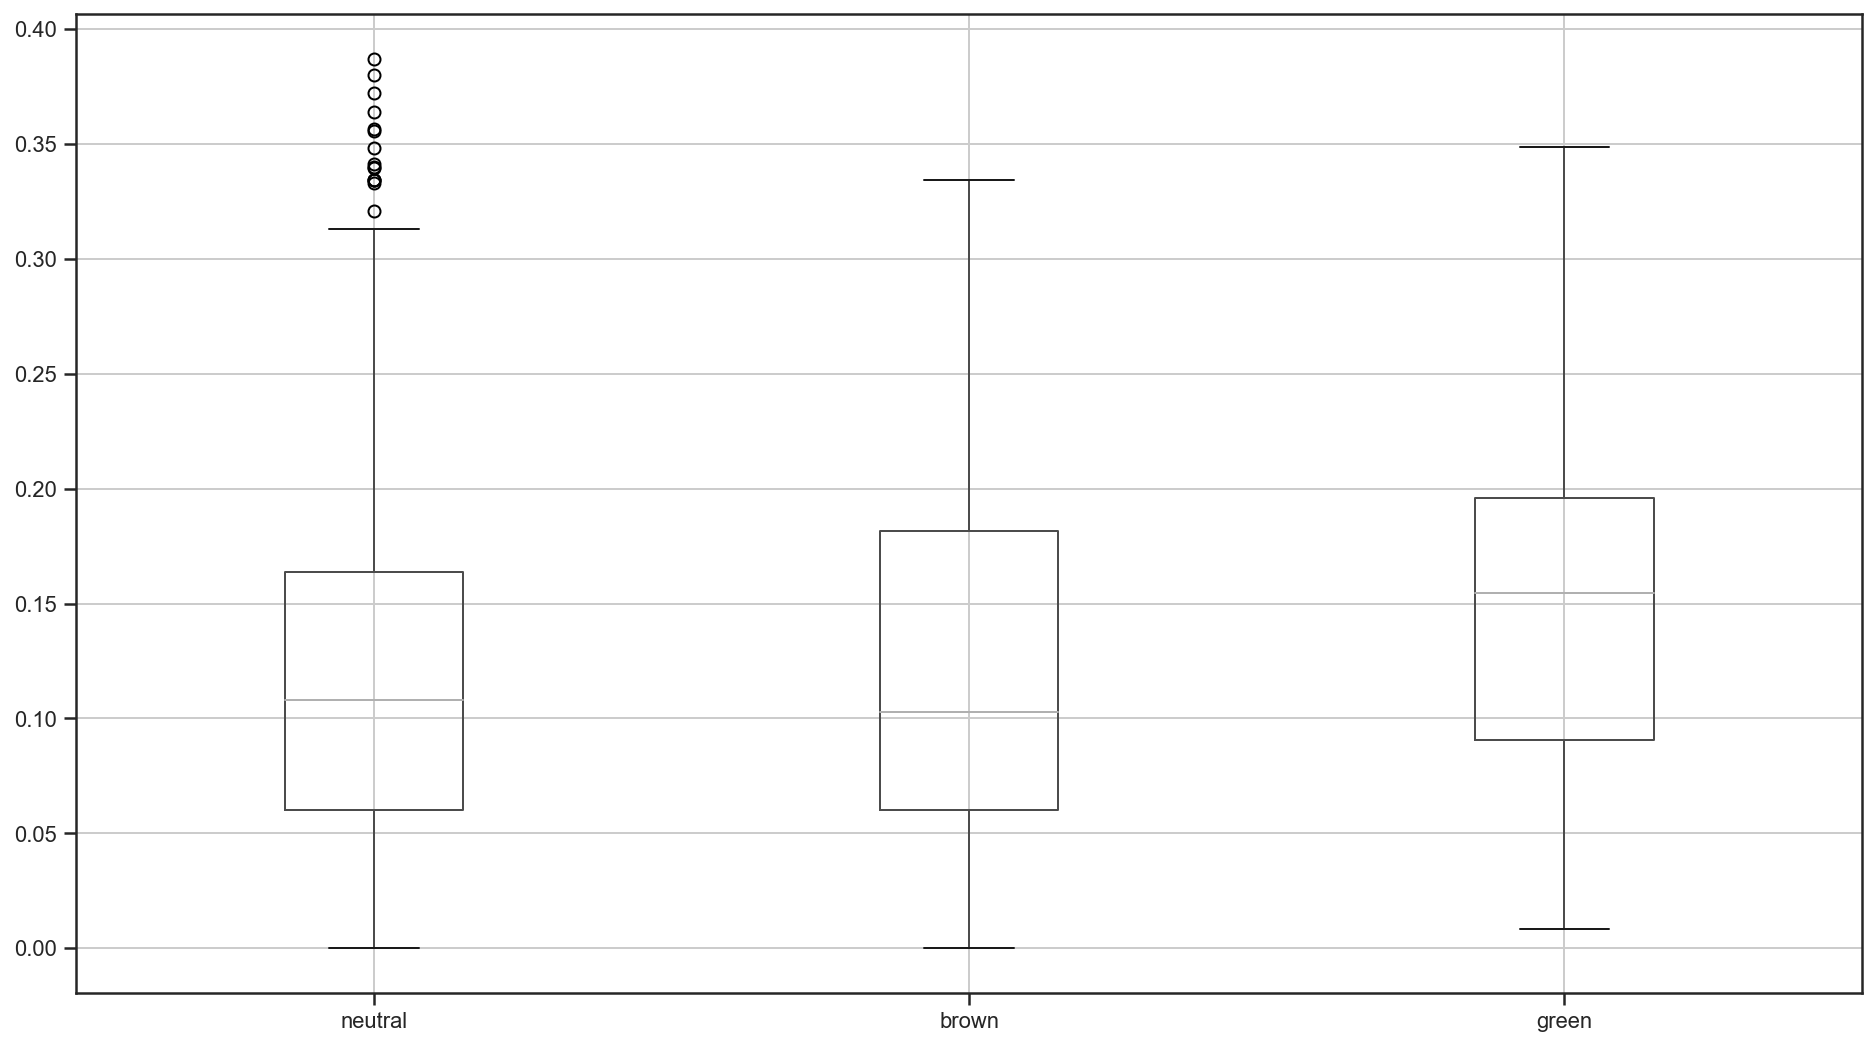

In [65]:
df_coreness.boxplot()

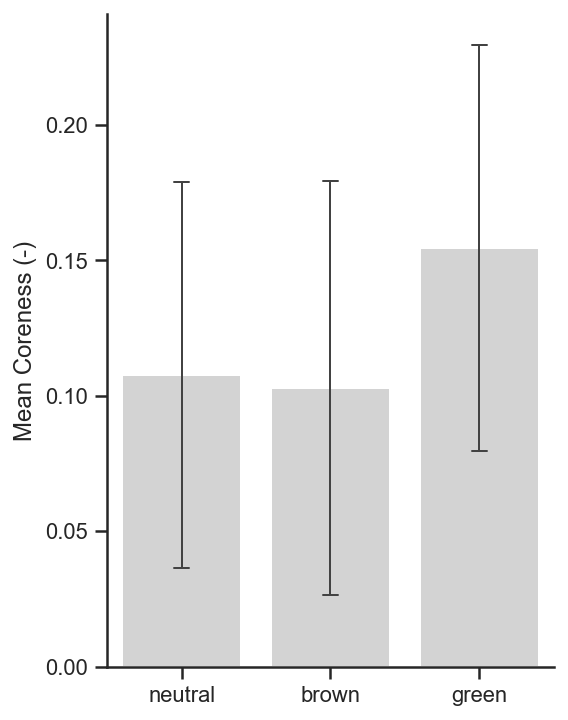

In [73]:
from numpy import median
f, ax = plt.subplots(figsize=(4, 6))
sns.barplot(
    data=df_coreness,
    color="lightgrey",
    ci="sd",
    errwidth=1,
    capsize=.1,
    orient="v",
    ax=ax,
    estimator=median
)

ax.set_ylabel("Mean Coreness (-)")

sns.despine()

neutral    0.107814
brown      0.102869
green      0.154552
dtype: float64

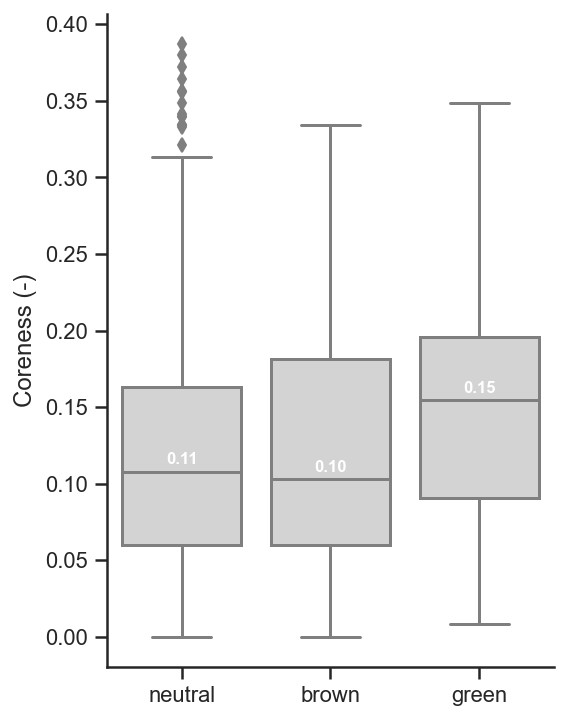

In [118]:
f, ax = plt.subplots(figsize=(4, 6))

sns.boxplot(
    data=df_coreness,
    color="lightgrey",
    orient="v",
    ax=ax
)

# annotate medians
medians = df_coreness.median()
vertical_offset = 0.005

for xtick in ax.get_xticks():
    ax.text(xtick,
            medians[xtick] + vertical_offset,
            "{:.2f}".format(medians[xtick]),
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')


ax.set_ylabel("Coreness (-)")

sns.despine()

## ANOVA

In [146]:
import scipy

scipy.stats.f_oneway(
    df_coreness.neutral.dropna().values,
    df_coreness.green.dropna().values,
    df_coreness.brown.dropna().values
)

F_onewayResult(statistic=45.47890733106595, pvalue=3.489358587444862e-20)

In [150]:
# F
scipy.stats.f_oneway(
    df_coreness.green.dropna().values,
    df_coreness.brown.dropna().values
)

F_onewayResult(statistic=35.910206811202, pvalue=3.0498725845611867e-09)

In [153]:
# F = t^2
scipy.stats.ttest_ind(
    df_coreness.green.dropna().values,
    df_coreness.brown.dropna().values
)

Ttest_indResult(statistic=5.992512562456756, pvalue=3.0498725845624274e-09)

In [154]:
scipy.stats.f_oneway(
    df_coreness.neutral.dropna().values,
    df_coreness.brown.dropna().values
)

F_onewayResult(statistic=1.9694173637020127, pvalue=0.16063080902778445)

In [155]:
scipy.stats.f_oneway(
    df_coreness.neutral.dropna().values,
    df_coreness.green.dropna().values
)

F_onewayResult(statistic=92.59634400917372, pvalue=1.4709941495776803e-21)

,variable,value
0,neutral,0.025147
3,neutral,0.113014
4,neutral,0.159505
5,neutral,0.110036
8,neutral,0.094083
...,...,...
8888,green,0.288912
8894,green,0.269854
8897,green,0.141736
8900,green,0.094690


In [163]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(
    df_coreness.melt().dropna().value,
    df_coreness.melt().dropna().variable
)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
brown,green,0.0311,0.001,0.0194,0.0428,True
brown,neutral,-0.0054,0.3441,-0.0145,0.0037,False
green,neutral,-0.0365,0.001,-0.0455,-0.0275,True


In [147]:

scipy.stats.kruskal(
    df_coreness.neutral.dropna().values,
    df_coreness.green.dropna().values,
    df_coreness.brown.dropna().values
)

KruskalResult(statistic=86.83027497773267, pvalue=1.3965142047359936e-19)

## Summary statistics

Flo: Mention 1-2 summary stats, e.g. how many skills on average per occupation;
how many essential...

In [67]:
# essential skills
occ_skills_matrix_essential_optional[occ_skills_matrix_essential_optional == 1].sum(axis=1).mean()

20.459551325628823

In [68]:
# optional skills
occ_skills_matrix_essential_optional[occ_skills_matrix_essential_optional == 2].divide(2).sum(axis=1).mean()

18.42318150917743

In [69]:
all = occ_skills_matrix_essential_optional.copy()
all[all != 0] = 1

all.sum(axis=1).mean()

38.882732834806255

<AxesSubplot:ylabel='Count'>

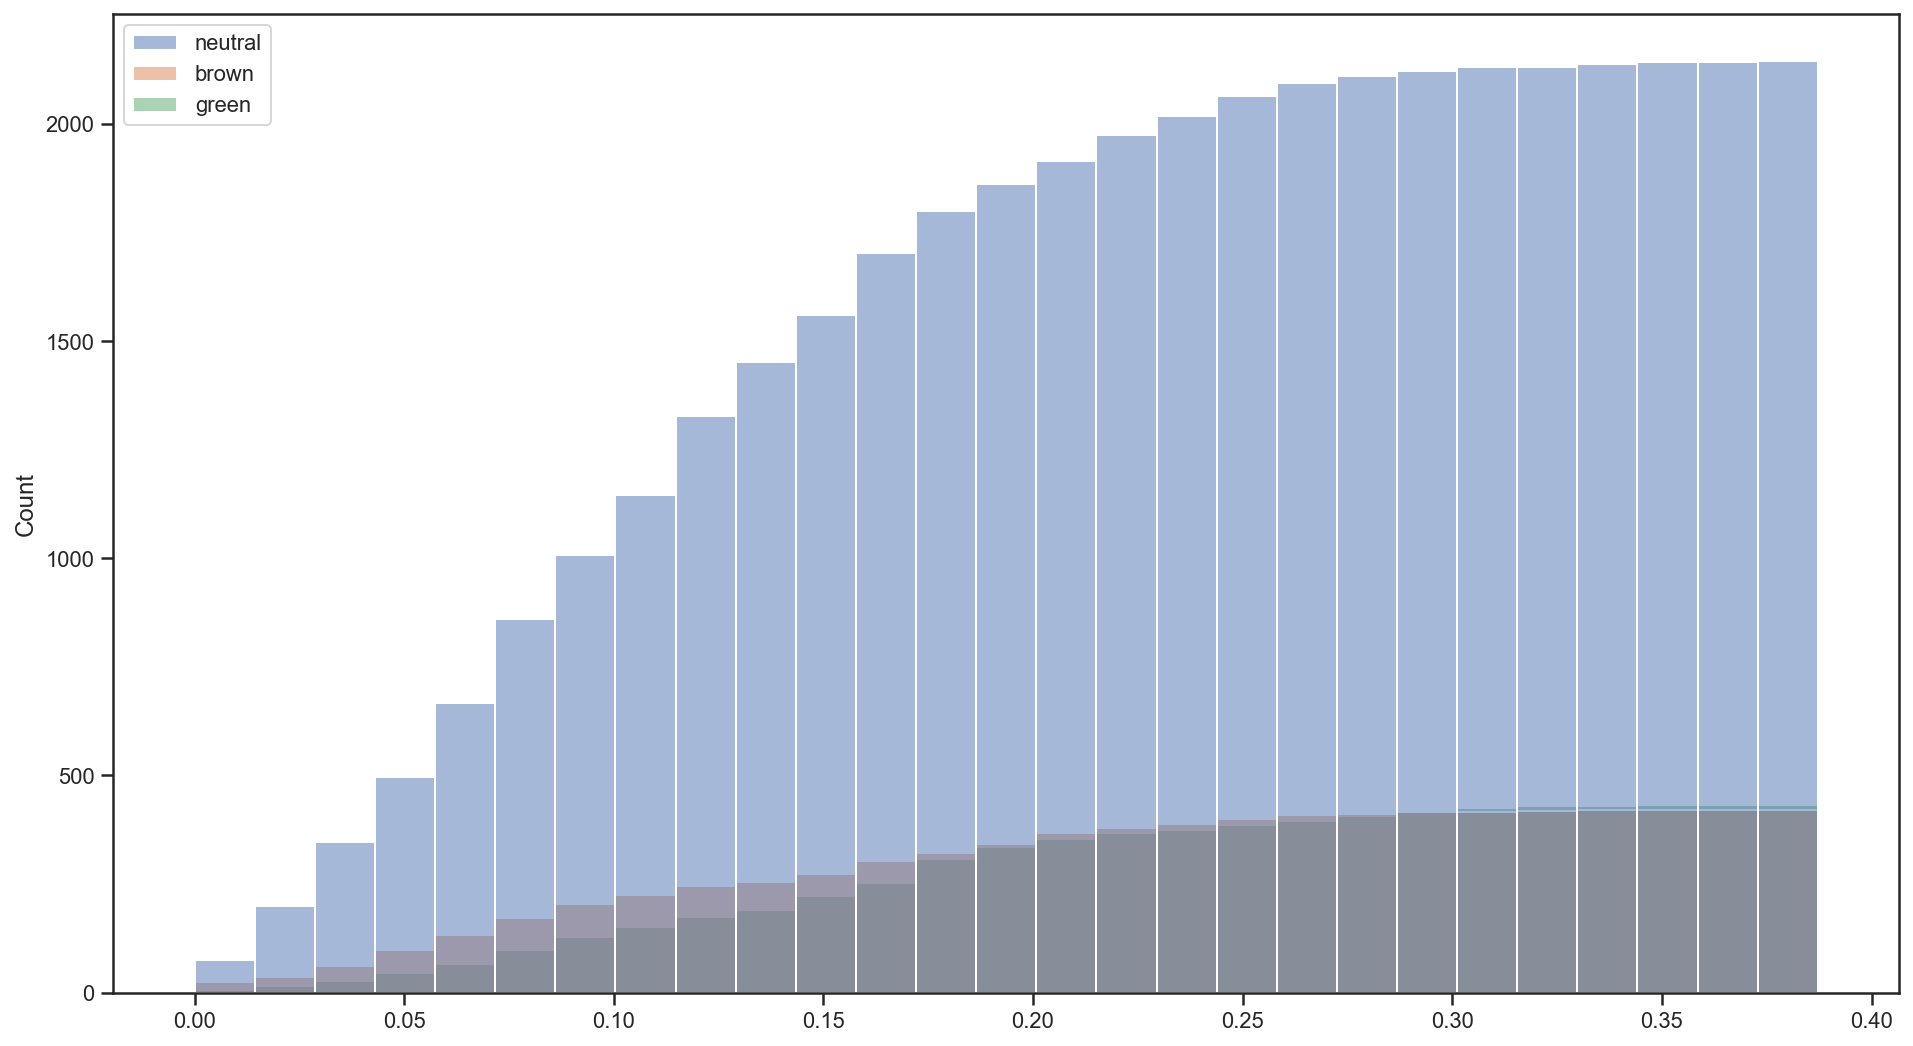